In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [2]:
plt.rcParams['figure.figsize'] = (9.6, 7.2)
plt.rcParams['image.cmap'] = 'Set2'

In [52]:
with rasterio.open('../data/LagunaTerminosUsoSuelo.tif', 'r') as r:
    raster = r.read(1)
    raster = np.ma.masked_equal(raster, 0)
    print('Pixel area = {} m^2'.format(np.prod(r.res)))

Pixel area = 625.0 m^2


<IPython.core.display.Javascript object>


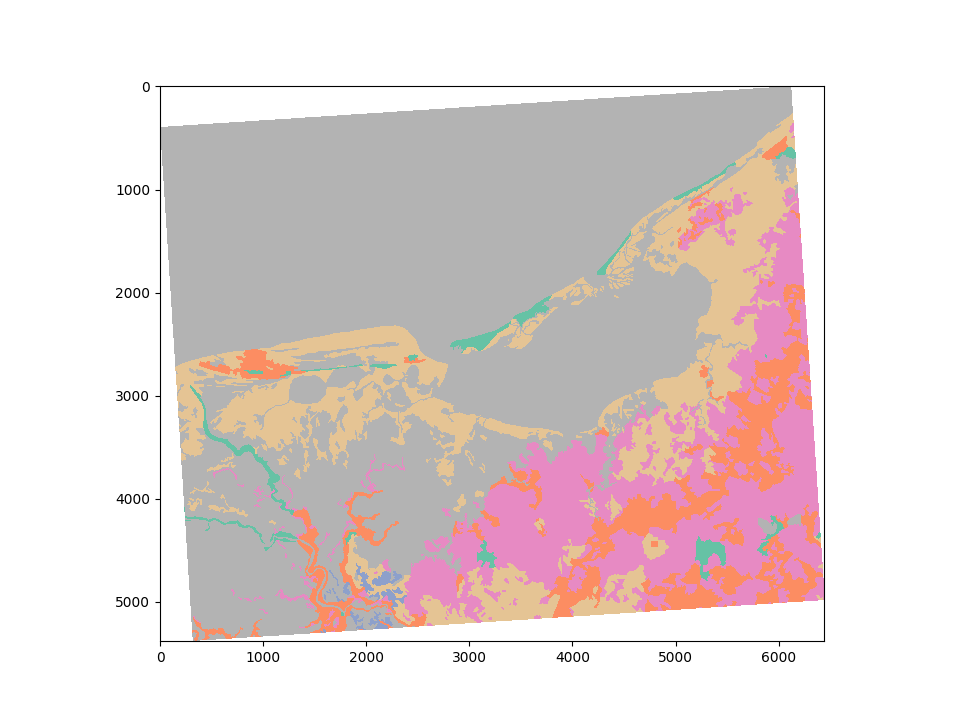

In [53]:
plt.imshow(raster)

In [5]:
raster = np.ma.masked_equal(raster, 7000) # Corresponde al valor del agua

<IPython.core.display.Javascript object>


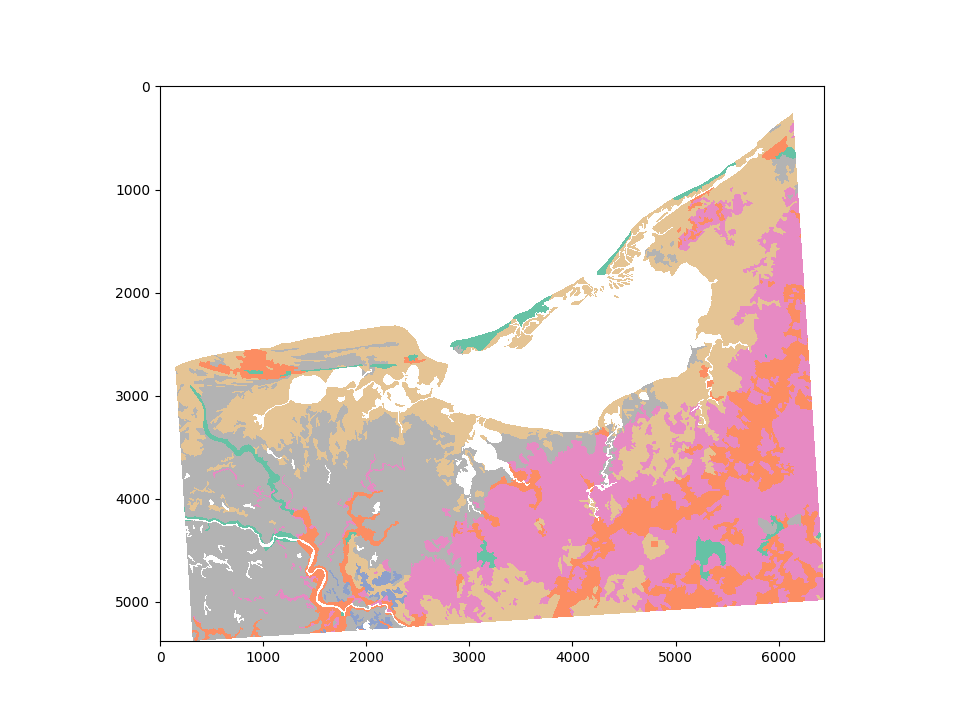

In [16]:
plt.imshow(raster)

In [7]:
np.unique(raster)

masked_array(data = [1300.0 1301.0 1303.0 1800.0 2000.0 2100.0 3500.0 3516.0 3517.0 3800.0
 3816.0 3817.0 3818.0 3916.0 3917.0 4000.0 4100.0 5800.0 6200.0 6300.0
 6400.0 6800.0 6900.0 7200.0 --],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True],
       fill_value = 7000.0)

<IPython.core.display.Javascript object>


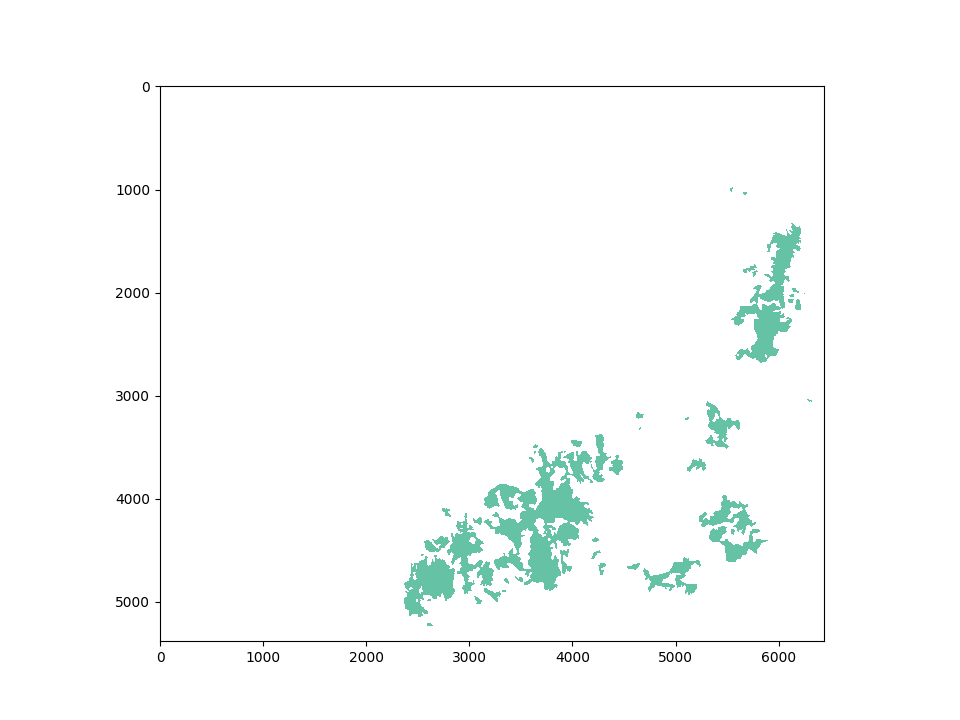

In [22]:
plt.imshow(np.ma.masked_not_equal(raster, 3800))

In [32]:
clase_3800 = np.ma.masked_not_equal(raster, 3800)

In [34]:
clase_3800 = np.ma.where(clase_3800 == 3800, 1, clase_3800).filled(0)

<IPython.core.display.Javascript object>


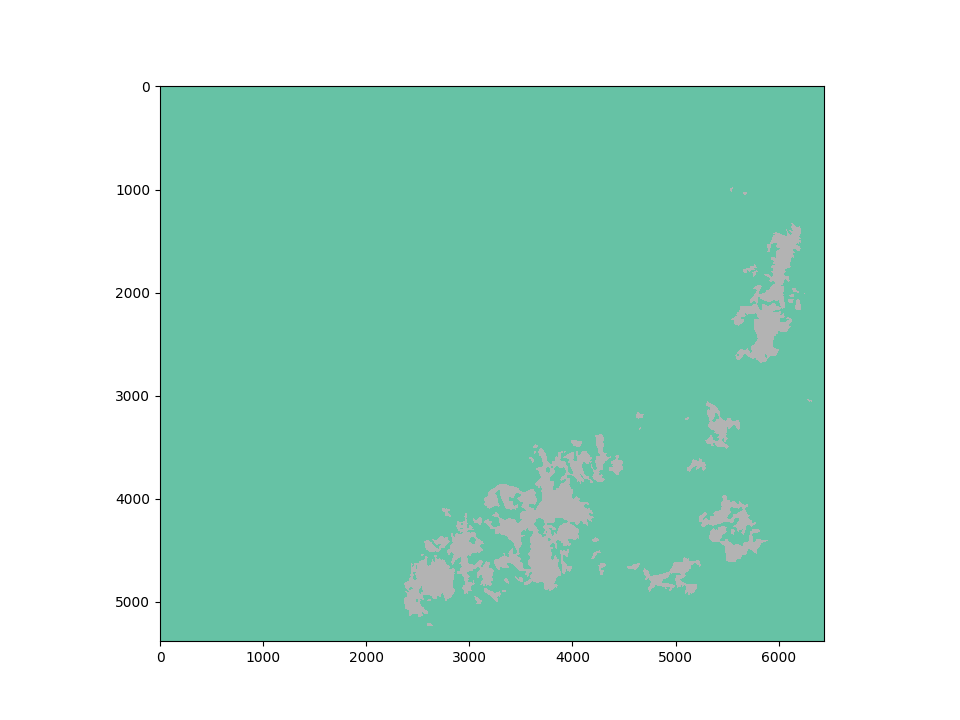

In [35]:
plt.imshow(clase_3800)

In [36]:
from scipy import ndimage

In [37]:
label_image, nd_labels = ndimage.label(clase_3800)

In [38]:
nd_labels

47

<IPython.core.display.Javascript object>


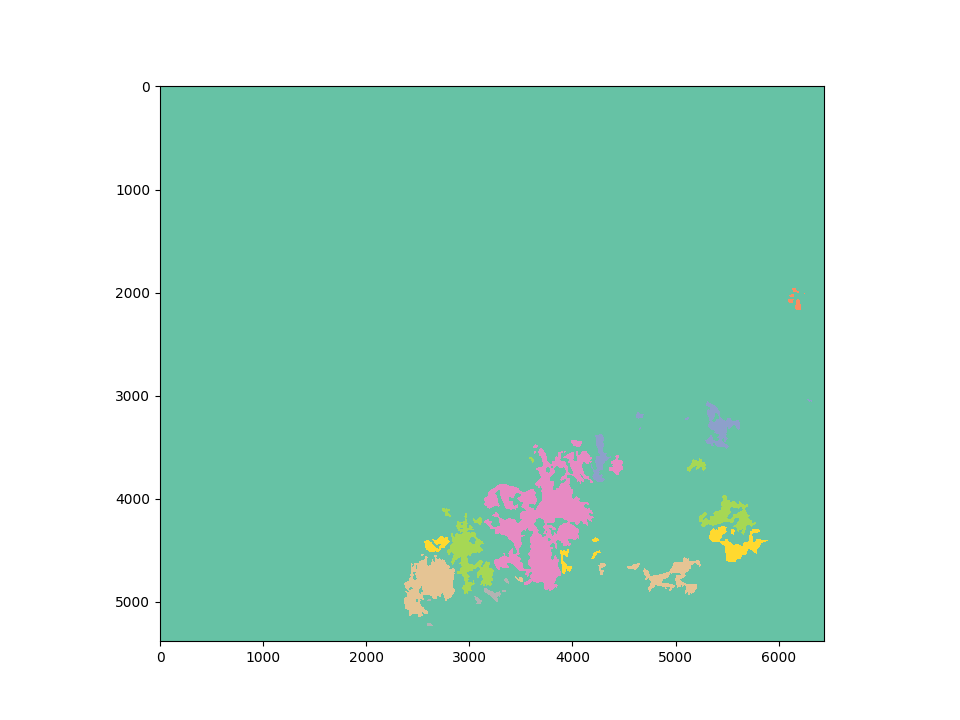

In [39]:
plt.imshow(label_image)

In [40]:
areas = ndimage.sum(clase_3800, label_image, range(nd_labels+1))

In [74]:
mask_size = areas*625 < 10**3 

In [77]:
remove_small = mask_size[label_image]

In [81]:
label_image[remove_small] = 0

In [84]:
labels = np.unique(label_image)
label_image = np.searchsorted(labels, label_image)

<IPython.core.display.Javascript object>


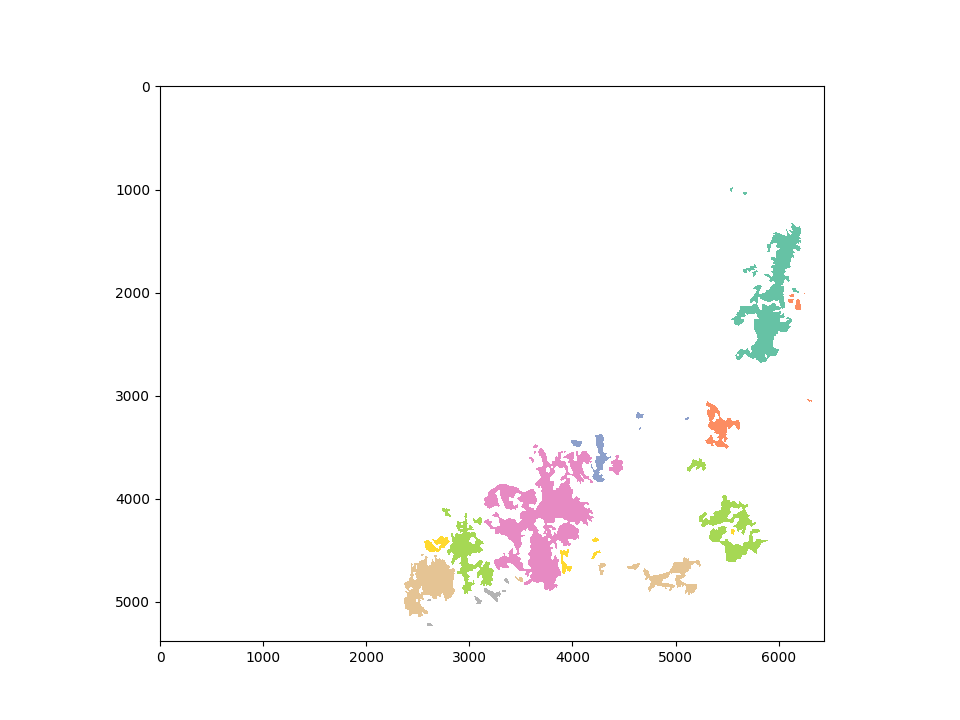

In [85]:
plt.imshow(np.ma.masked_equal(label_image,0))